## Importing Important Libraries 

In [636]:
#Importing the Essentials library

import pandas as pd
import seaborn as sns
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

## Getting the Data 

In [637]:
#Getting the Data and reading it
#Note: It is better to keep the data and the code in the same directory

data = pd.read_csv("../laptop_price.csv", encoding="latin-1")
data

laptop_ID Company                              Product  \
0             1   Apple                          MacBook Pro   
1             2   Apple                          Macbook Air   
2             3      HP                               250 G6   
3             4   Apple                          MacBook Pro   
4             5   Apple                          MacBook Pro   
...         ...     ...                                  ...   
1298       1316  Lenovo                       Yoga 500-14ISK   
1299       1317  Lenovo                       Yoga 900-13ISK   
1300       1318  Lenovo                   IdeaPad 100S-14IBR   
1301       1319      HP  15-AC110nv (i7-6500U/6GB/1TB/Radeon   
1302       1320    Asus  X553SA-XX031T (N3050/4GB/500GB/W10)   

                TypeName  Inches                            ScreenResolution  \
0              Ultrabook    13.3          IPS Panel Retina Display 2560x1600   
1              Ultrabook    13.3                                    1440x900   
2               Notebook    15.6                           Full HD 1920x1080   
3              Ultrabook    15.4          IPS Panel Retina Display 2880x1800   
4              Ultrabook    13.3          IPS Panel Retina Display 2560x1600   
...                  ...     ...                                         ...   
1298  2 in 1 Convertible    14.0   IPS Panel Full HD / Touchscreen 1920x1080   
1299  2 in 1 Convertible    13.3  IPS Panel Quad HD+ / Touchscreen 3200x1800   
1300            Notebook    14.0                                    1366x768   
1301            Notebook    15.6                                    1366x768   
1302            Notebook    15.6                                    1366x768   

                                       Cpu   Ram               Memory  \
0                     Intel Core i5 2.3GHz   8GB            128GB SSD   
1                     Intel Core i5 1.8GHz   8GB  128GB Flash Storage   
2               Intel Core i5 7200U 2.5GHz   8GB            256GB SSD   
3                     Intel Core i7 2.7GHz  16GB            512GB SSD   
4                     Intel Core i5 3.1GHz   8GB            256GB SSD   
...                                    ...   ...                  ...   
1298            Intel Core i7 6500U 2.5GHz   4GB            128GB SSD   
1299            Intel Core i7 6500U 2.5GHz  16GB            512GB SSD   
1300  Intel Celeron Dual Core N3050 1.6GHz   2GB   64GB Flash Storage   
1301            Intel Core i7 6500U 2.5GHz   6GB              1TB HDD   
1302  Intel Celeron Dual Core N3050 1.6GHz   4GB            500GB HDD   

                               Gpu       OpSys  Weight  Price_euros  
0     Intel Iris Plus Graphics 640       macOS  1.37kg      1339.69  
1           Intel HD Graphics 6000       macOS  1.34kg       898.94  
2            Intel HD Graphics 620       No OS  1.86kg       575.00  
3               AMD Radeon Pro 455       macOS  1.83kg      2537.45  
4     Intel Iris Plus Graphics 650       macOS  1.37kg      1803.60  
...                            ...         ...     ...          ...  
1298         Intel HD Graphics 520  Windows 10   1.8kg       638.00  
1299         Intel HD Graphics 520  Windows 10   1.3kg      1499.00  
1300             Intel HD Graphics  Windows 10   1.5kg       229.00  
1301            AMD Radeon R5 M330  Windows 10  2.19kg       764.00  
1302             Intel HD Graphics  Windows 10   2.2kg       369.00  

[1303 rows x 13 columns]

# Data Preprocessing

## Removing Unwanted columns and adding other columns


In this section, we perform essential data preprocessing steps to enhance the dataset's suitability for laptop price prediction. The main actions undertaken are:

1. **Removal of Irrelevant Columns**: The "Product" column has been removed from the dataset as it does not provide valuable information for the laptop price prediction model. Removing irrelevant features helps improve model efficiency and accuracy.

2. **One-Hot Encoding of Categorical Variables**:
   - **Company Names**: We have created separate columns for each unique company name to represent laptop manufacturers. This one-hot encoding technique transforms categorical company names into binary columns, allowing the model to consider the manufacturer as a factor in predicting prices.
   - **Type Names**: Similarly, we have applied one-hot encoding to the "TypeName" column to create individual columns for different laptop types. This categorization enables the model to factor in the laptop type during price prediction.

These preprocessing steps help structure the data and make it more suitable for machine learning algorithms. By encoding categorical variables and removing irrelevant information, we prepare the dataset for accurate laptop price predictions.


In [638]:
# Drop the "Product" column since it is not relevant to our laptop price prediction model.
data = data.drop("Product", axis=1)

# Create separate columns for company names to maintain a more structured dataset.
data = data.join(pd.get_dummies(data.Company))
data = data.drop("Company", axis=1)

# Create separate columns for the "TypeName" to enhance the dataset's stability.
data = data.join(pd.get_dummies(data.TypeName))
data = data.drop("TypeName", axis=1)


In [639]:
#Printing modified data
data

laptop_ID  Inches                            ScreenResolution  \
0             1    13.3          IPS Panel Retina Display 2560x1600   
1             2    13.3                                    1440x900   
2             3    15.6                           Full HD 1920x1080   
3             4    15.4          IPS Panel Retina Display 2880x1800   
4             5    13.3          IPS Panel Retina Display 2560x1600   
...         ...     ...                                         ...   
1298       1316    14.0   IPS Panel Full HD / Touchscreen 1920x1080   
1299       1317    13.3  IPS Panel Quad HD+ / Touchscreen 3200x1800   
1300       1318    14.0                                    1366x768   
1301       1319    15.6                                    1366x768   
1302       1320    15.6                                    1366x768   

                                       Cpu   Ram               Memory  \
0                     Intel Core i5 2.3GHz   8GB            128GB SSD   
1                     Intel Core i5 1.8GHz   8GB  128GB Flash Storage   
2               Intel Core i5 7200U 2.5GHz   8GB            256GB SSD   
3                     Intel Core i7 2.7GHz  16GB            512GB SSD   
4                     Intel Core i5 3.1GHz   8GB            256GB SSD   
...                                    ...   ...                  ...   
1298            Intel Core i7 6500U 2.5GHz   4GB            128GB SSD   
1299            Intel Core i7 6500U 2.5GHz  16GB            512GB SSD   
1300  Intel Celeron Dual Core N3050 1.6GHz   2GB   64GB Flash Storage   
1301            Intel Core i7 6500U 2.5GHz   6GB              1TB HDD   
1302  Intel Celeron Dual Core N3050 1.6GHz   4GB            500GB HDD   

                               Gpu       OpSys  Weight  Price_euros  ...  \
0     Intel Iris Plus Graphics 640       macOS  1.37kg      1339.69  ...   
1           Intel HD Graphics 6000       macOS  1.34kg       898.94  ...   
2            Intel HD Graphics 620       No OS  1.86kg       575.00  ...   
3               AMD Radeon Pro 455       macOS  1.83kg      2537.45  ...   
4     Intel Iris Plus Graphics 650       macOS  1.37kg      1803.60  ...   
...                            ...         ...     ...          ...  ...   
1298         Intel HD Graphics 520  Windows 10   1.8kg       638.00  ...   
1299         Intel HD Graphics 520  Windows 10   1.3kg      1499.00  ...   
1300             Intel HD Graphics  Windows 10   1.5kg       229.00  ...   
1301            AMD Radeon R5 M330  Windows 10  2.19kg       764.00  ...   
1302             Intel HD Graphics  Windows 10   2.2kg       369.00  ...   

      Samsung  Toshiba  Vero  Xiaomi  2 in 1 Convertible  Gaming  Netbook  \
0           0        0     0       0                   0       0        0   
1           0        0     0       0                   0       0        0   
2           0        0     0       0                   0       0        0   
3           0        0     0       0                   0       0        0   
4           0        0     0       0                   0       0        0   
...       ...      ...   ...     ...                 ...     ...      ...   
1298        0        0     0       0                   1       0        0   
1299        0        0     0       0                   1       0        0   
1300        0        0     0       0                   0       0        0   
1301        0        0     0       0                   0       0        0   
1302        0        0     0       0                   0       0        0   

      Notebook  Ultrabook  Workstation  
0            0          1            0  
1            0          1            0  
2            1          0            0  
3            0          1            0  
4            0          1            0  
...        ...        ...          ...  
1298         0          0            0  
1299         0          0            0  
1300         1          0            0  
1301         1          0   

In [640]:
data.shape

(1303, 35)

# Data Transformation: Converting Categorical to Numeric

 Now that we have expanded our dataset to include 35 columns, it's essential to address the presence of non-numeric values
 in various columns. These non-numeric values, such as GBs for storage, RAM specifications, screen sizes, and other laptop
 features, need to be transformed into a numeric format. This transformation is imperative for the proper functioning of
 machine learning algorithms that require numerical input.

 **Steps Taken:**
 1. Converting Storage Capacity (e.g., GBs): We convert storage capacity values to numeric format, enabling the model to
    understand and utilize these specifications effectively.
 2. Converting RAM Specifications: RAM information is also transformed into a numeric format to provide the model with
    meaningful data.
 3. Handling Other Laptop Features: Similar transformations are applied to various other laptop features, ensuring that
    all relevant attributes are available in a numeric form.

The resulting dataset will be properly structured and prepared for machine learning algorithms, allowing them to make accurate predictions of laptop prices based on these features.


In [641]:
# Extract screen resolution information
# Split and extract the screen resolution, width, and height.

data["ScreenResolution"] = data.ScreenResolution.str.split(" ").apply(lambda x: x[-1])
data["Screen Width"] = data.ScreenResolution.str.split("x").apply(lambda x: x[0])
data["Screen Height"] = data.ScreenResolution.str.split("x").apply(lambda x: x[1])

In [642]:
# Remove the original "ScreenResolution" column as we have extracted the necessary data.

data = data.drop("ScreenResolution", axis=1)

In [643]:
# Extract CPU information
# Split and extract the CPU brand and frequency from the "Cpu" column.

data["CPU Brand"] = data.Cpu.str.split(" ").apply(lambda x: x[0])
data["CPU Frequency"] = data.Cpu.str.split(" ").apply(lambda x: x[-1])

In [644]:
# Remove the original "Cpu" column as we have extracted the necessary data.

data = data.drop("Cpu", axis=1)

In [645]:
# Extract numeric values from CPU Frequency and RAM columns
# Remove units (e.g., GHz from CPU Frequency, GB from RAM).

data["CPU Frequency"] = data["CPU Frequency"].str[:-3]
data["Ram"] = data["Ram"].str[:-2]

In [647]:
# Convert data types
# Convert RAM, CPU Frequency, Screen Width, and Screen Height columns to appropriate numeric data types.

data["Ram"] = data["Ram"].astype("int")
data["CPU Frequency"] = data["CPU Frequency"].astype("float")
data["Screen Width"] = data["Screen Width"].astype("int")
data["Screen Height"] = data["Screen Height"].astype("int")

In [648]:
# Extract Memory Amount and Memory Type
# Split and extract the memory amount and memory type from the "Memory" column.

data["Memory Amount"] = data.Memory.str.split(" ").apply(lambda x: x[0])
data["Memory Type"] = data.Memory.str.split(" ").apply(lambda x: x[1])

In [649]:
# Convert Memory Amount to MB
# Define a function to convert memory values to megabytes (MB).

def turn_memory_into_MB(value):
    if "GB" in value:
        return float(value[:value.find("GB")]) * 1000
    elif "TB" in value:
        return float(value[:value.find("TB")]) * 1000000

In [650]:
# Apply it to the "Memory Amount" column.

data["Memory Amount"] = data["Memory Amount"].apply(turn_memory_into_MB)

In [651]:
# Remove the original "Memory" column as we have extracted the necessary data.

data = data.drop("Memory", axis=1)

In [652]:
data = data.join(pd.get_dummies(data['Memory Type']))
data = data.drop("Memory Type", axis=1)

In [653]:
# Extract Weight information
# Remove units (e.g., kg) from the "Weight" column and convert to float data type.

data["Weight"] = data["Weight"].str[:-2]
data["Weight"] = data["Weight"].astype("float")

In [654]:
# Extract GPU Brand
# Split and extract the GPU brand from the "Gpu" column.

data["GPU Brand"] = data.Gpu.str.split(" ").apply(lambda x: x[0])

In [655]:
# Remove the original "Gpu" column as we have extracted the GPU brand.
data = data.drop("Gpu", axis=1)

In [656]:
# Encode Operating System (OpSys) information
# Create separate columns for different operating systems using one-hot encoding.

data = data.join(pd.get_dummies(data.OpSys))
data = data.drop("OpSys", axis=1)

In [657]:
# Encode CPU Brand information
# Create separate columns for different CPU brands using one-hot encoding.

cpu_categories = pd.get_dummies(data["CPU Brand"])
cpu_categories.columns = [col + "_CPU" for col in cpu_categories.columns]

data = data.join(cpu_categories)
data = data.drop("CPU Brand", axis=1)

In [658]:
# Encode GPU Brand information
# Create separate columns for different GPU brands using one-hot encoding.

gpu_categories = pd.get_dummies(data["GPU Brand"])
gpu_categories.columns = [col + "_GPU" for col in gpu_categories.columns]

data = data.join(gpu_categories)
data = data.drop("GPU Brand", axis=1)

In [659]:
data

laptop_ID  Inches  Ram  Weight  Price_euros  Acer  Apple  Asus  Chuwi  \
0             1    13.3    8    1.37      1339.69     0      1     0      0   
1             2    13.3    8    1.34       898.94     0      1     0      0   
2             3    15.6    8    1.86       575.00     0      0     0      0   
3             4    15.4   16    1.83      2537.45     0      1     0      0   
4             5    13.3    8    1.37      1803.60     0      1     0      0   
...         ...     ...  ...     ...          ...   ...    ...   ...    ...   
1298       1316    14.0    4    1.80       638.00     0      0     0      0   
1299       1317    13.3   16    1.30      1499.00     0      0     0      0   
1300       1318    14.0    2    1.50       229.00     0      0     0      0   
1301       1319    15.6    6    2.19       764.00     0      0     0      0   
1302       1320    15.6    4    2.20       369.00     0      0     1      0   

      Dell  ...  Windows 10 S  Windows 7  macOS  AMD_CPU  Intel_CPU  \
0        0  ...             0          0      1        0          1   
1        0  ...             0          0      1        0          1   
2        0  ...             0          0      0        0          1   
3        0  ...             0          0      1        0          1   
4        0  ...             0          0      1        0          1   
...    ...  ...           ...        ...    ...      ...        ...   
1298     0  ...             0          0      0        0          1   
1299     0  ...             0          0      0        0          1   
1300     0  ...             0          0      0        0          1   
1301     0  ...             0          0      0        0          1   
1302     0  ...             0          0      0        0          1   

      Samsung_CPU  AMD_GPU  ARM_GPU  Intel_GPU  Nvidia_GPU  
0               0        0        0          1           0  
1               0        0        0          1           0  
2               0        0        0          1           0  
3               0        1        0          0           0  
4               0        0        0          1           0  
...           ...      ...      ...        ...         ...  
1298            0        0        0          1           0  
1299            0        0        0          1           0  
1300            0        0        0          1           0  
1301            0        1        0          0           0  
1302            0        0        0          1           0  

[1303 rows x 54 columns]

# Data Visulizatoin

### Plotting the Heatmap of the Data 

<Axes: >

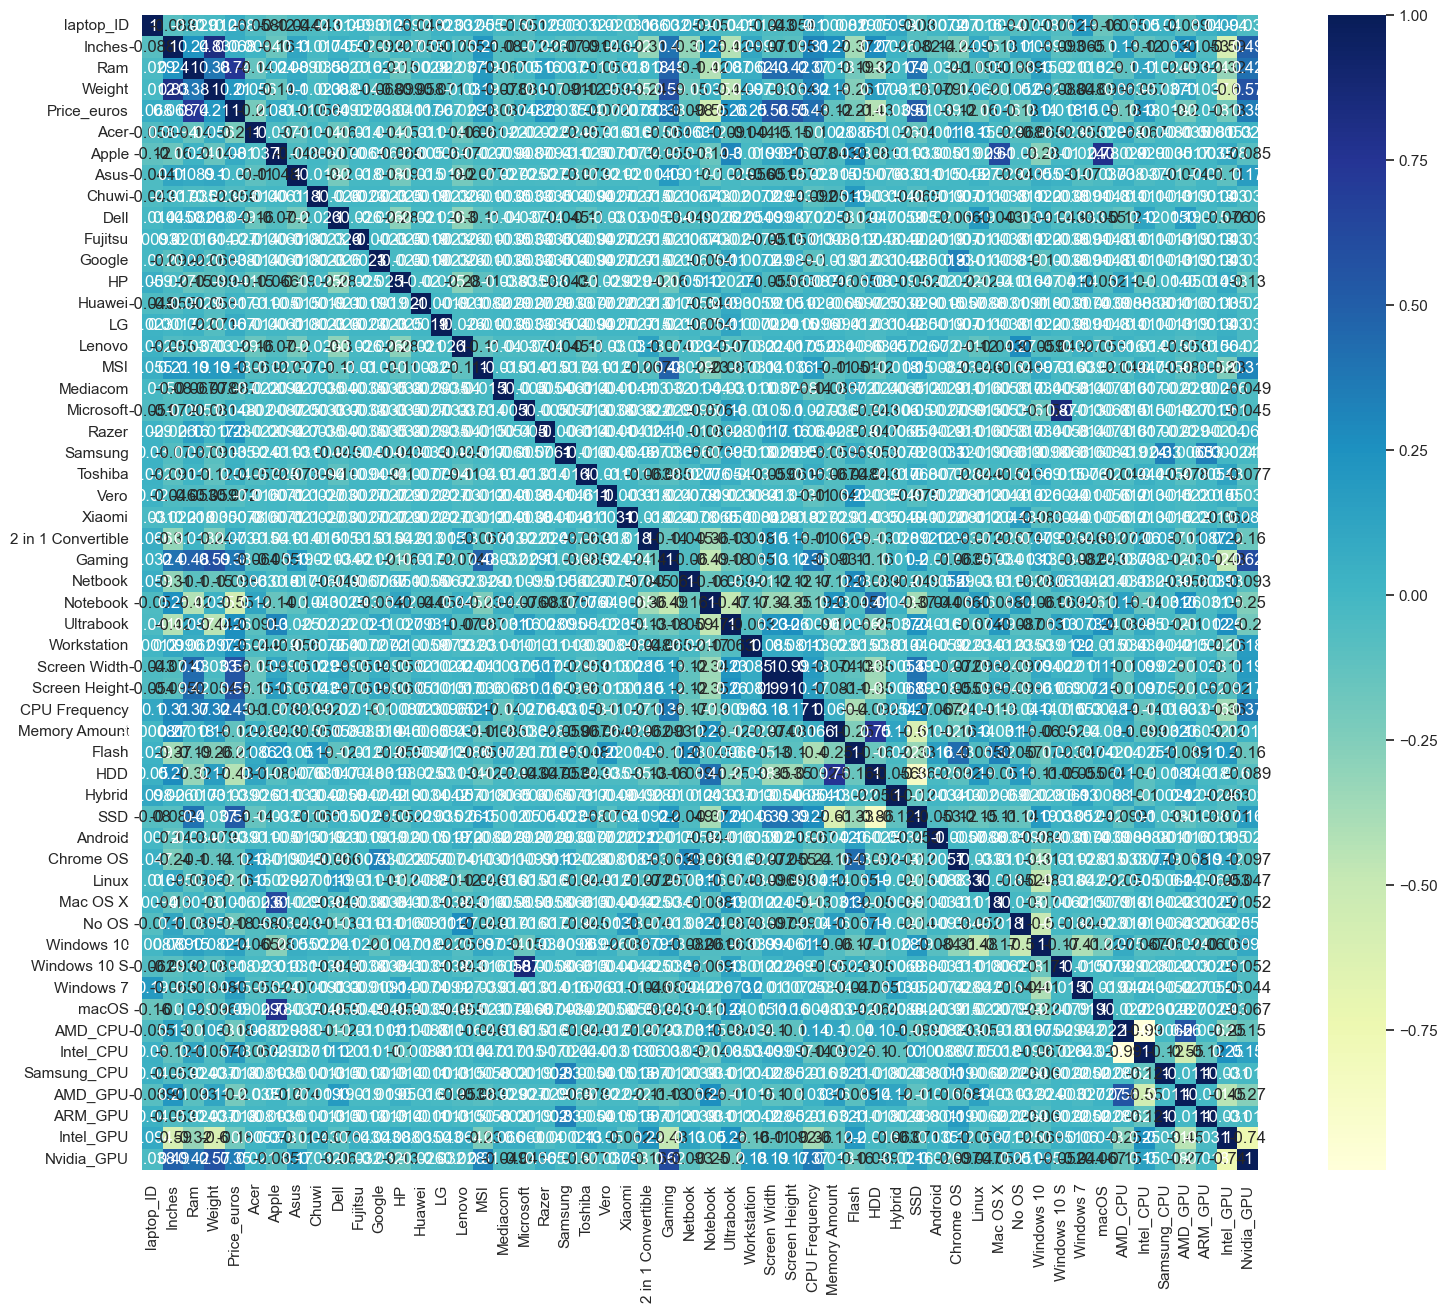

In [660]:
# Create a heatmap to visualize the correlation matrix with annotations

plt.figure(figsize=(18, 15))
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")

## Exploring Heatmap for Data Visualization

In our data exploration process, we've generated a heatmap to visualize the relationships and correlations among the various attributes in our dataset. However, it's evident that the heatmap isn't providing a clear and concise representation of these relationships. The primary reason for this distortion is the sheer number of columns in our dataset, which stands at 51.

While the complete dataset with 54 columns is vital for the accuracy and performance of our laptop price prediction model, it can be challenging to create an informative and easily interpretable heatmap with such a large number of attributes. Therefore, for the purpose of data visualization only, we are considering the temporary removal of some columns.

To clarify, we emphasize that this column reduction is solely for the purpose of creating a more visually comprehensible heatmap during our exploratory data analysis. The removal of these columns is not a reflection of their importance in our machine learning model. When it comes to utilizing the machine learning algorithm for laptop price predictions, all 54 columns will be included to ensure the model's comprehensive understanding of the data.

In summary, this temporary column reduction is aimed at enhancing data visualization clarity. It will not impact the integrity of our predictive model, which will continue to leverage the full dataset for delivering precise and reliable laptop price predictions.


In [661]:
# Calculate correlations with target variable
target_correlations = data.corr()['Price_euros'].apply(abs).sort_values()

In [662]:
# Display sorted correlations

target_correlations

Xiaomi                0.000776
Asus                  0.010376
Mac OS X              0.015656
Huawei                0.016851
Windows 10 S          0.018312
ARM_GPU               0.018431
Samsung_CPU           0.018431
Fujitsu               0.027135
Lenovo                0.029007
Samsung               0.034584
Google                0.038086
Android               0.038700
Hybrid                0.039386
Toshiba               0.040339
HP                    0.041291
Microsoft             0.047562
Dell                  0.048509
Chuwi                 0.055646
LG                    0.067053
laptop_ID             0.067830
Inches                0.068197
Vero                  0.071972
2 in 1 Convertible    0.072675
Apple                 0.080688
Mediacom              0.087161
macOS                 0.089928
Netbook               0.097572
Chrome OS             0.118684
Memory Amount         0.122365
Windows 10            0.137048
Windows 7             0.152381
Linux                 0.162060
No OS   

In [663]:
# Select top 24 features
selected_features = target_correlations[-24:].index
selected_features = list(selected_features)

In [664]:
# Displaying top 24 features.
selected_features

['Windows 7',
 'Linux',
 'No OS',
 'MSI',
 'AMD_CPU',
 'Intel_CPU',
 'Intel_GPU',
 'AMD_GPU',
 'Acer',
 'Weight',
 'Flash',
 'Razer',
 'Workstation',
 'Ultrabook',
 'Nvidia_GPU',
 'Gaming',
 'HDD',
 'CPU Frequency',
 'SSD',
 'Notebook',
 'Screen Height',
 'Screen Width',
 'Ram',
 'Price_euros']

In [665]:
# Create a new DataFrame containing only the selected features

sorted_data = data[selected_features]

In [666]:
sorted_data

Windows 7  Linux  No OS  MSI  AMD_CPU  Intel_CPU  Intel_GPU  AMD_GPU  \
0             0      0      0    0        0          1          1        0   
1             0      0      0    0        0          1          1        0   
2             0      0      1    0        0          1          1        0   
3             0      0      0    0        0          1          0        1   
4             0      0      0    0        0          1          1        0   
...         ...    ...    ...  ...      ...        ...        ...      ...   
1298          0      0      0    0        0          1          1        0   
1299          0      0      0    0        0          1          1        0   
1300          0      0      0    0        0          1          1        0   
1301          0      0      0    0        0          1          0        1   
1302          0      0      0    0        0          1          1        0   

      Acer  Weight  ...  Nvidia_GPU  Gaming  HDD  CPU Frequency  SSD  \
0        0    1.37  ...           0       0    0            2.3    1   
1        0    1.34  ...           0       0    0            1.8    0   
2        0    1.86  ...           0       0    0            2.5    1   
3        0    1.83  ...           0       0    0            2.7    1   
4        0    1.37  ...           0       0    0            3.1    1   
...    ...     ...  ...         ...     ...  ...            ...  ...   
1298     0    1.80  ...           0       0    0            2.5    1   
1299     0    1.30  ...           0       0    0            2.5    1   
1300     0    1.50  ...           0       0    0            1.6    0   
1301     0    2.19  ...           0       0    1            2.5    0   
1302     0    2.20  ...           0       0    1            1.6    0   

      Notebook  Screen Height  Screen Width  Ram  Price_euros  
0            0           1600          2560    8      1339.69  
1            0            900          1440    8       898.94  
2            1           1080          1920    8       575.00  
3            0           1800          2880   16      2537.45  
4            0           1600          2560    8      1803.60  
...        ...            ...           ...  ...          ...  
1298         0           1080          1920    4       638.00  
1299         0           1800          3200   16      1499.00  
1300         1            768          1366    2       229.00  
1301         1            768          1366    6       764.00  
1302         1            768          1366    4       369.00  

[1303 rows x 24 columns]

<Axes: >

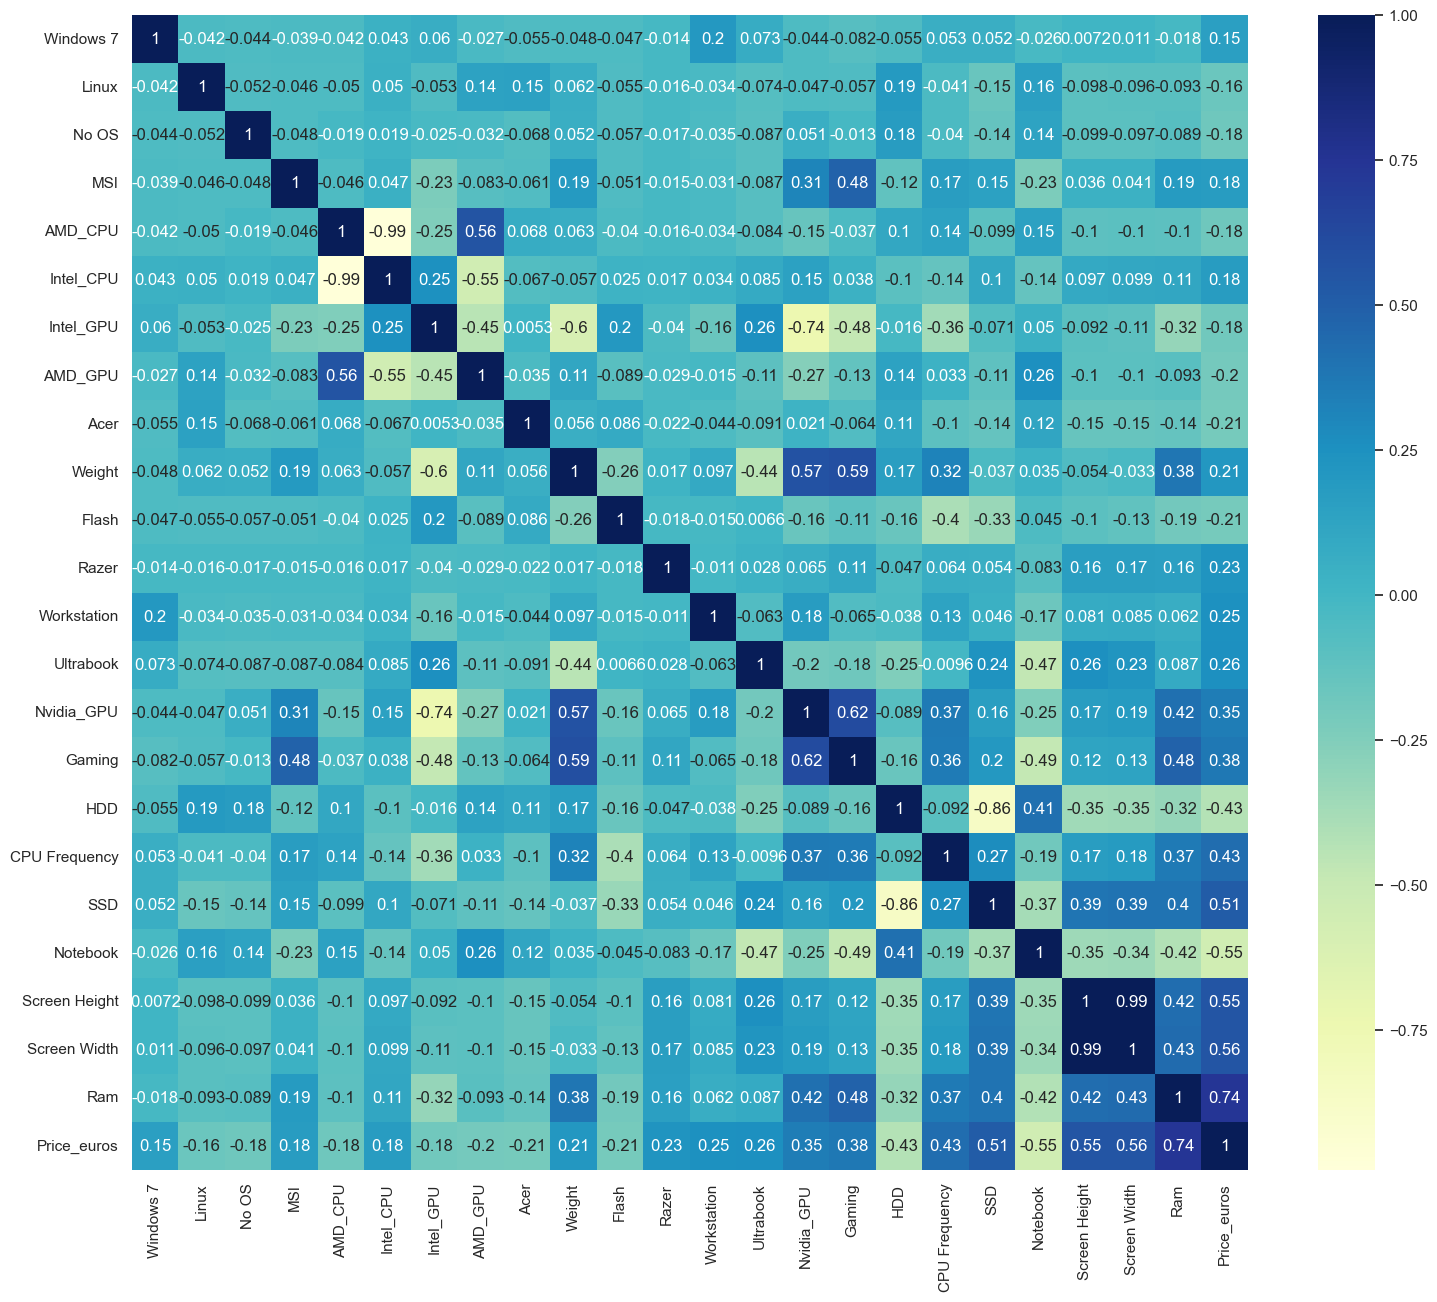

In [667]:
# Plotting the sorted data heatmap, for more clear and concise view

plt.figure(figsize=(18, 15))
sns.heatmap(sorted_data.corr(), annot=True, cmap="YlGnBu")

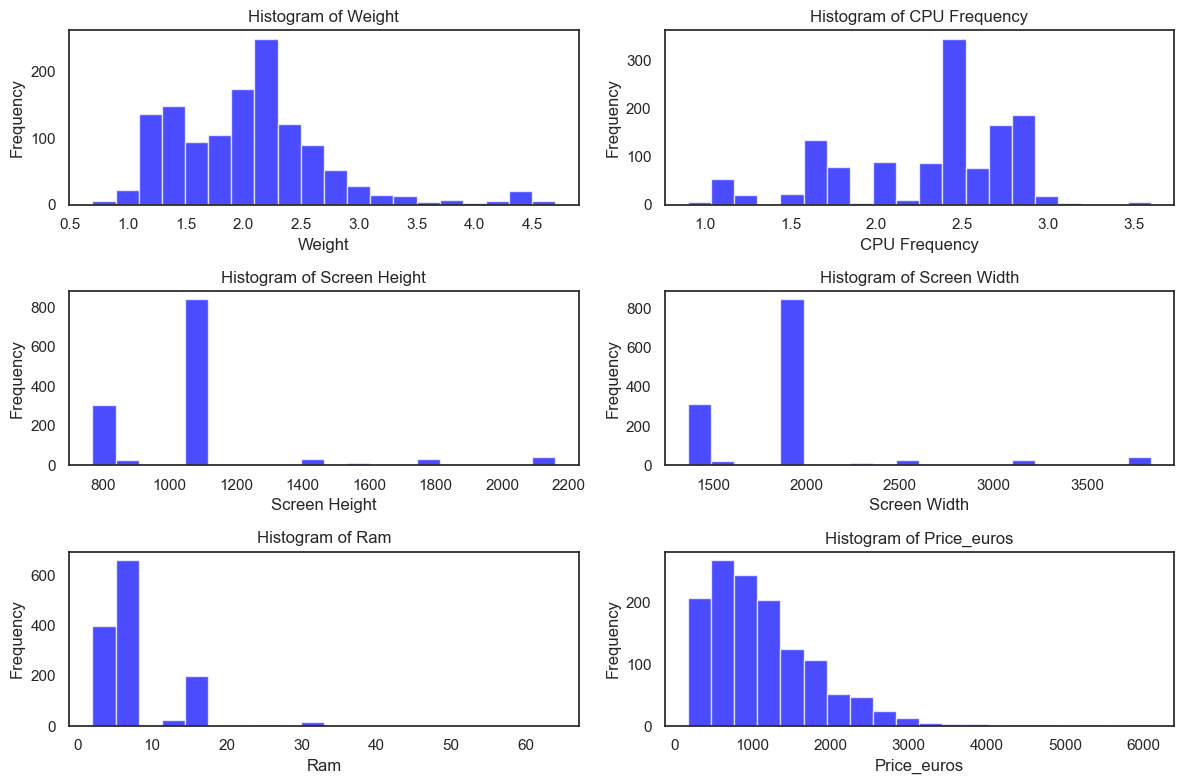

In [668]:
# Create subplots for histograms
fig, axes = plt.subplots(3, 2, figsize=(12, 8))

# Plot histograms for numerical columns
columns_to_plot = ["Weight", "CPU Frequency", "Screen Height", "Screen Width", "Ram", "Price_euros"]

for i, column in enumerate(columns_to_plot):
    ax = axes[i // 2, i % 2]
    ax.hist(data[column], bins=20, color='blue', alpha=0.7)
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show the histograms
plt.show()


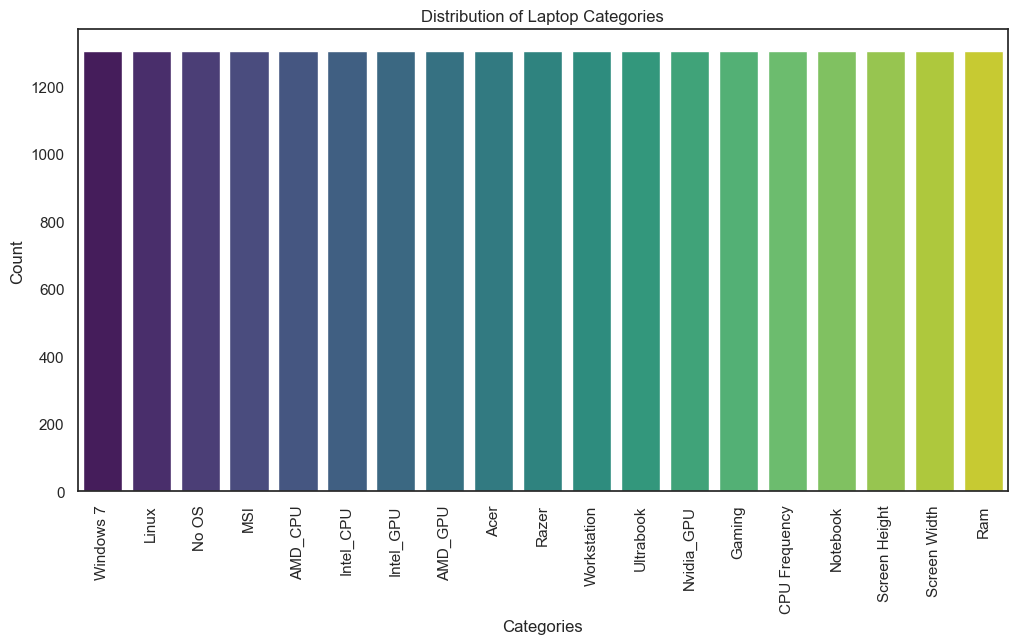

In [669]:

# List of column names needed to be access
columns_to_access = ['Windows 7', 'Linux', 'No OS', 'MSI', 'AMD_CPU', 'Intel_CPU', 'Intel_GPU', 'AMD_GPU', 'Acer', 'Razer', 'Workstation', 'Ultrabook', 'Nvidia_GPU', 'Gaming', 'CPU Frequency', 'Notebook', 'Screen Height', 'Screen Width', 'Ram']

# Access the DataFrame using the list of column names
category_column = sorted_data[columns_to_access]

# Create a bar chart
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
sns.countplot(data=category_column, palette="viridis")  # Customize palette as needed

# Add labels and title
plt.xlabel("Categories")
plt.ylabel("Count")
plt.title("Distribution of Laptop Categories")

# Show the plot
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility if needed
plt.show()

In [670]:
# Create a box plot for the "Price_euros" column
plt.figure(figsize=(8, 6))
sns.boxplot(x=data["Price_euros"])
plt.title("Box Plot of Laptop Prices")
plt.xlabel("Price (euros)")
plt.show()

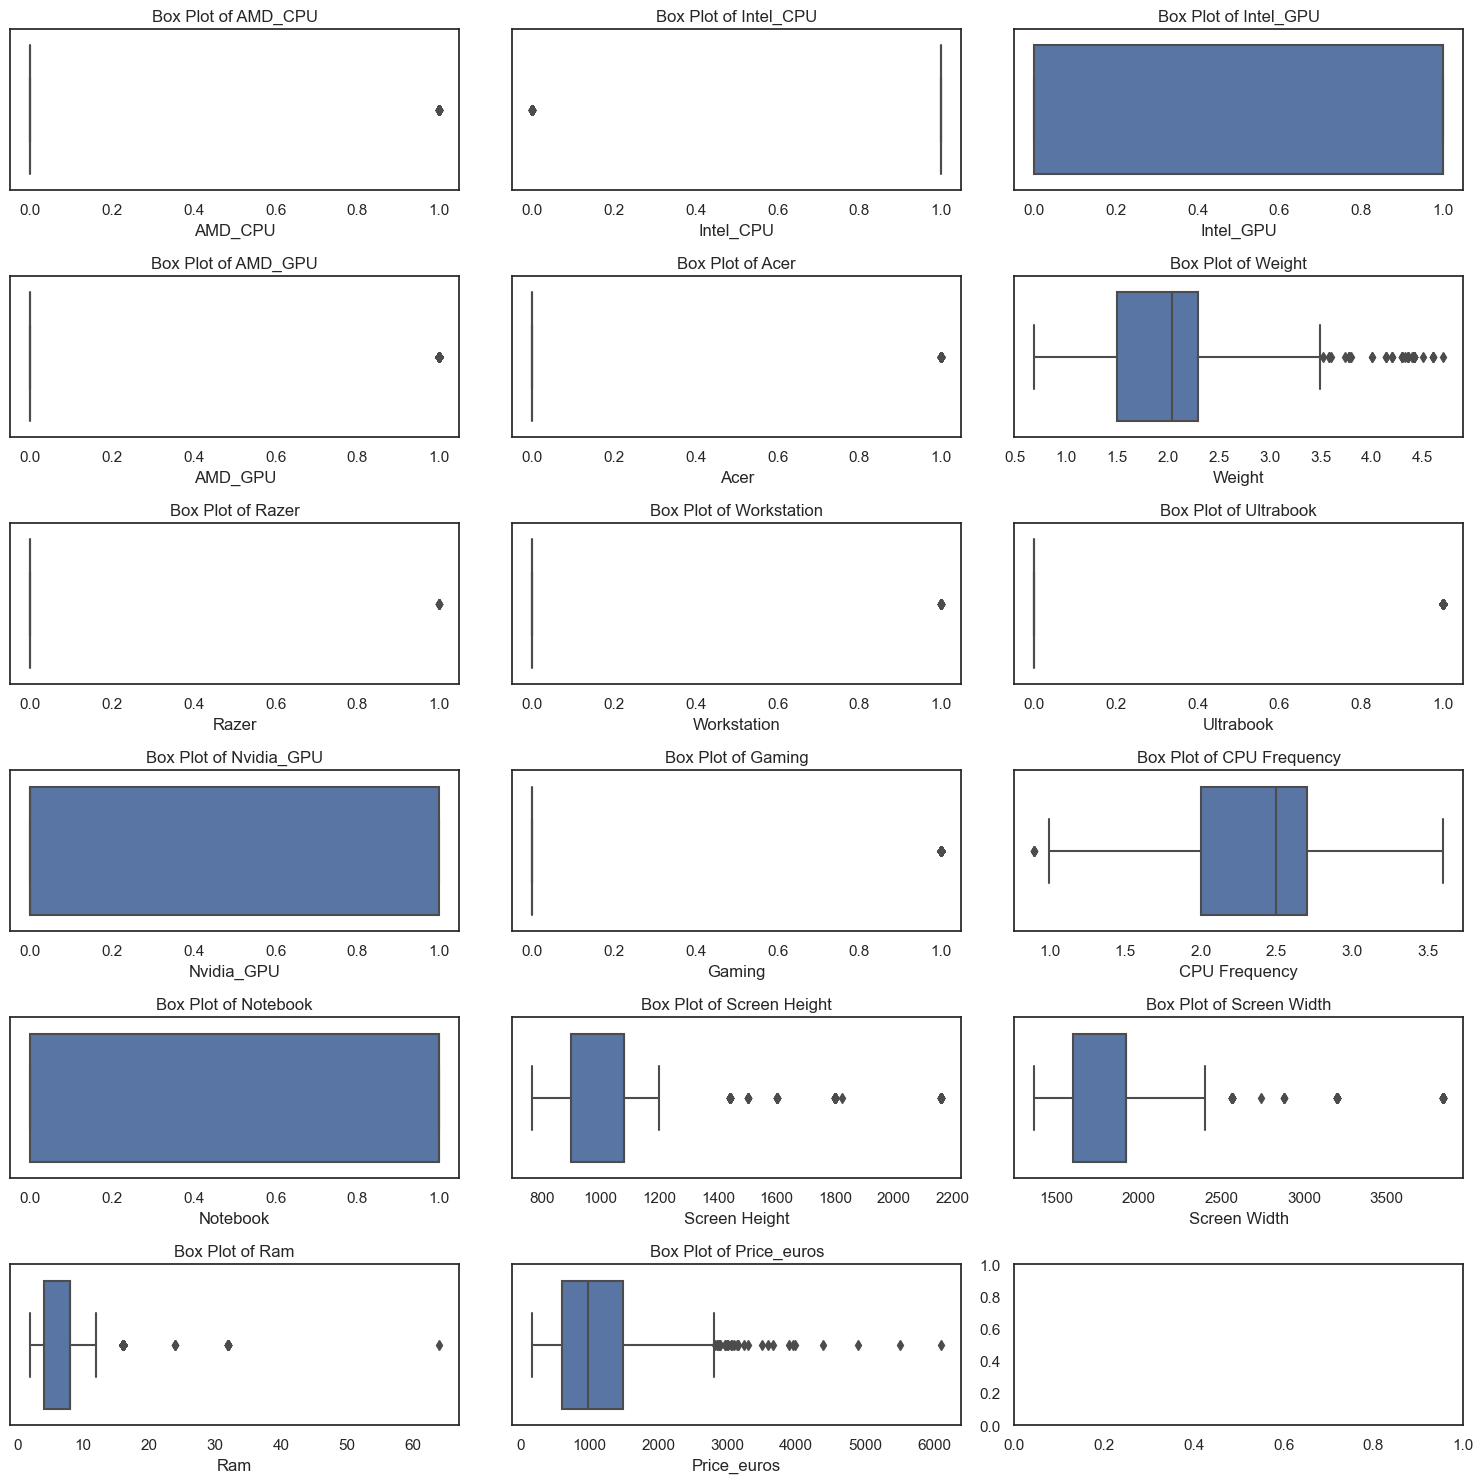

In [671]:
# List of columns to create box plots
columns_to_plot = ['AMD_CPU', 'Intel_CPU', 'Intel_GPU', 'AMD_GPU', 'Acer', 'Weight', 'Razer', 'Workstation',
                   'Ultrabook', 'Nvidia_GPU', 'Gaming', 'CPU Frequency', 'Notebook', 'Screen Height',
                   'Screen Width', 'Ram', 'Price_euros']

# Create subplots for each column
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(15, 15))

# Flatten the axes for easy iteration
axes = axes.flatten()

# Create box plots for each column
for i, column in enumerate(columns_to_plot):
    sns.boxplot(x=data[column], ax=axes[i])
    axes[i].set_title(f'Box Plot of {column}')
    axes[i].set_xlabel(column)

# Adjust the layout
plt.tight_layout()
plt.show()

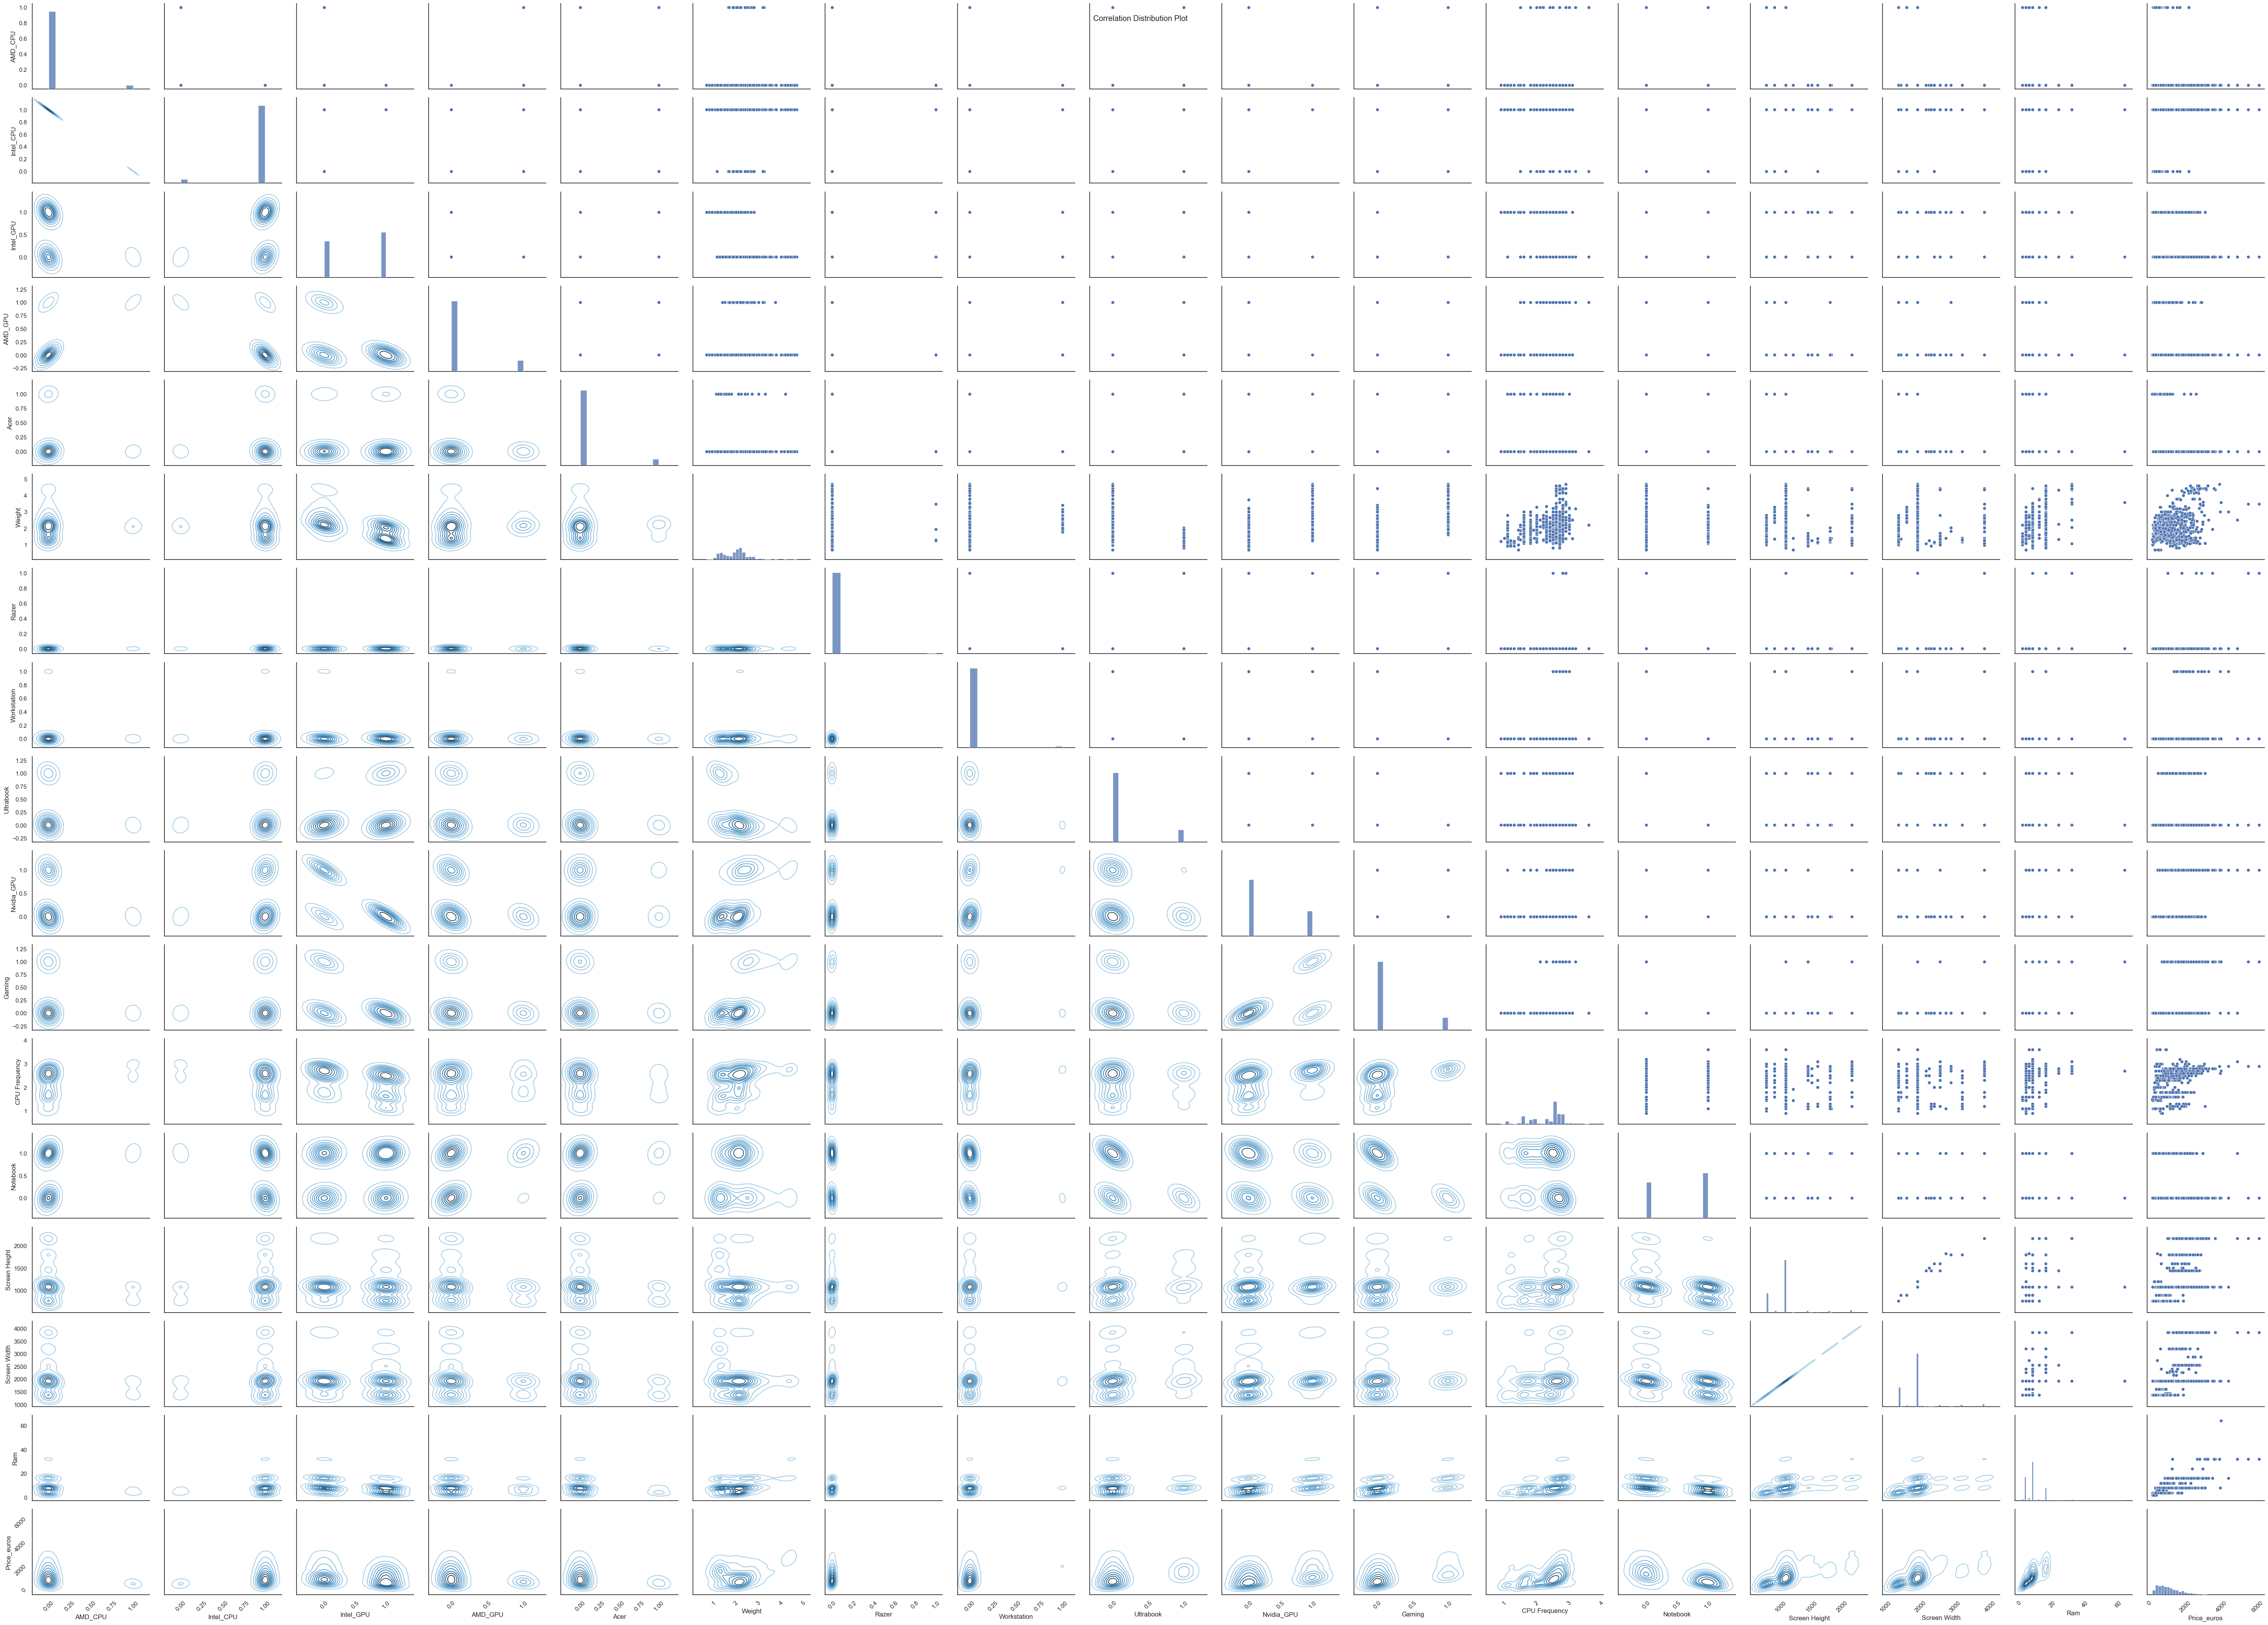

In [672]:
# List of columns for creating correlation distplots
columns_to_plot = [
    'AMD_CPU', 'Intel_CPU', 'Intel_GPU', 'AMD_GPU', 'Acer', 'Weight', 'Razer',
    'Workstation', 'Ultrabook', 'Nvidia_GPU', 'Gaming', 'CPU Frequency',
    'Notebook', 'Screen Height', 'Screen Width', 'Ram', 'Price_euros'
]

# Create a pairplot with correlation distplots
sns.set(style="white")
g = sns.PairGrid(data[columns_to_plot], aspect=1.4)
g.map_upper(sns.scatterplot)
g.map_diag(sns.histplot, kde_kws={'color': 'k'})
g.map_lower(sns.kdeplot, cmap="Blues_d")

# Set the title
g.fig.suptitle("Correlation Distribution Plot")

# Rotate the x-axis labels for better readability
for ax in g.axes[-1, :]:
    ax.tick_params(labelrotation=45)

# Show the plot
plt.show()

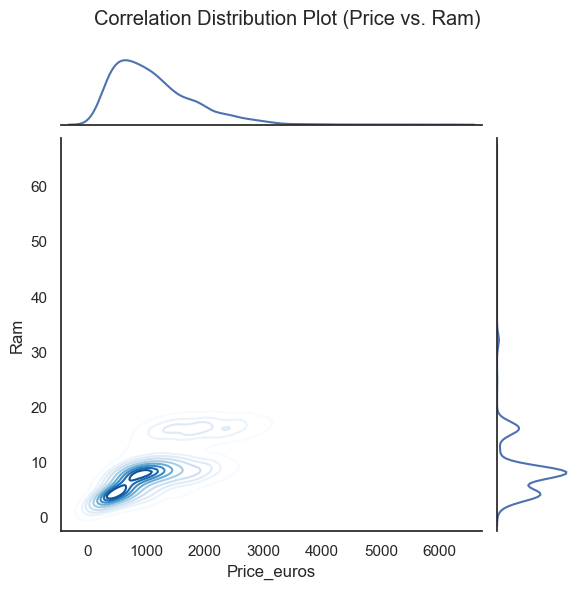

In [673]:
# Create a jointplot for Price_euros (x) and Ram (y)
sns.set(style="white")
sns.jointplot(x="Price_euros", y="Ram", data=data, kind="kde", cmap="Blues")

# Set the title
plt.subplots_adjust(top=0.9)
plt.suptitle("Correlation Distribution Plot (Price vs. Ram)")

# Show the plot
plt.show()

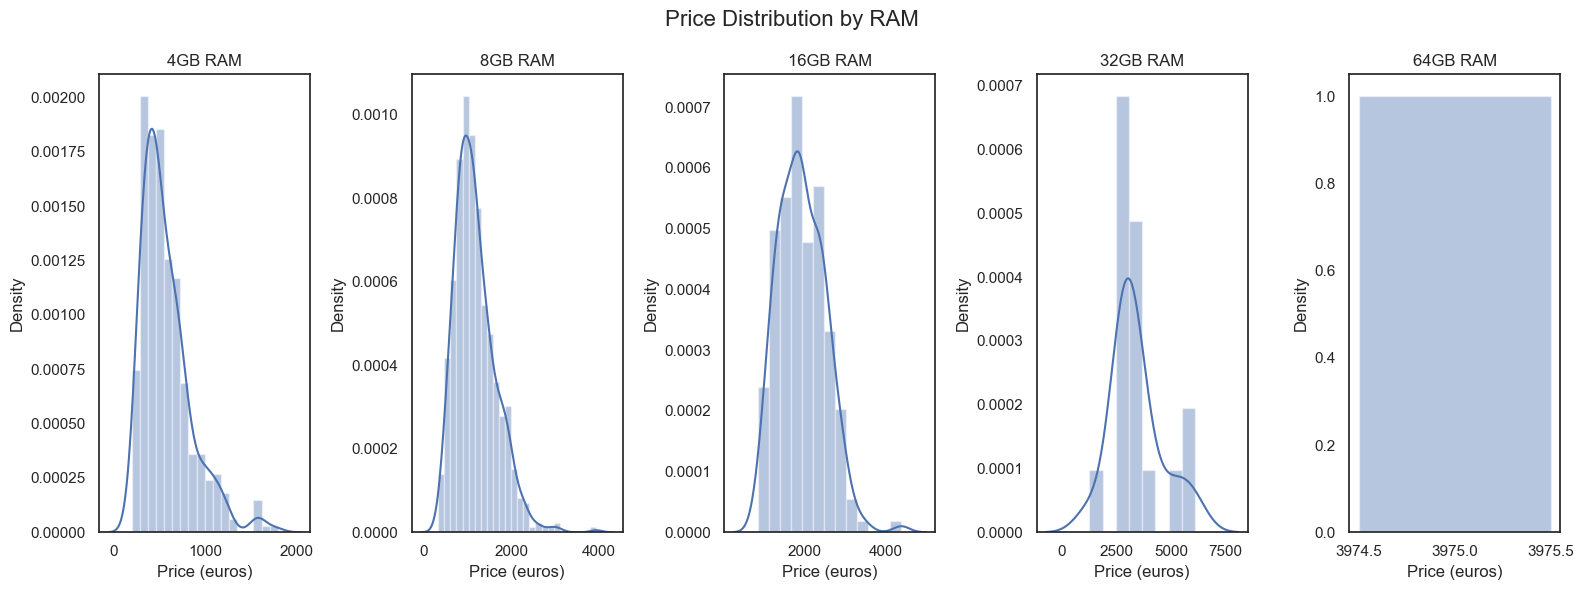

In [674]:
# List of RAM sizes to plot
ram_sizes = [4, 8, 16, 32, 64]

# Create subplots for each RAM size
fig, axes = plt.subplots(nrows=1, ncols=len(ram_sizes), figsize=(16, 6))

for i, ram_size in enumerate(ram_sizes):
    sns.distplot(data[data['Ram'] == ram_size]["Price_euros"], kde=True, ax=axes[i])
    axes[i].set_title(f'{ram_size}GB RAM')
    axes[i].set_xlabel('Price (euros)')
    axes[i].set_ylabel('Density')

# Set the overall plot title
plt.suptitle('Price Distribution by RAM', fontsize=16)

# Adjust the layout
plt.tight_layout()

# Show the plots
plt.show()

<Figure size 2000x2000 with 0 Axes>

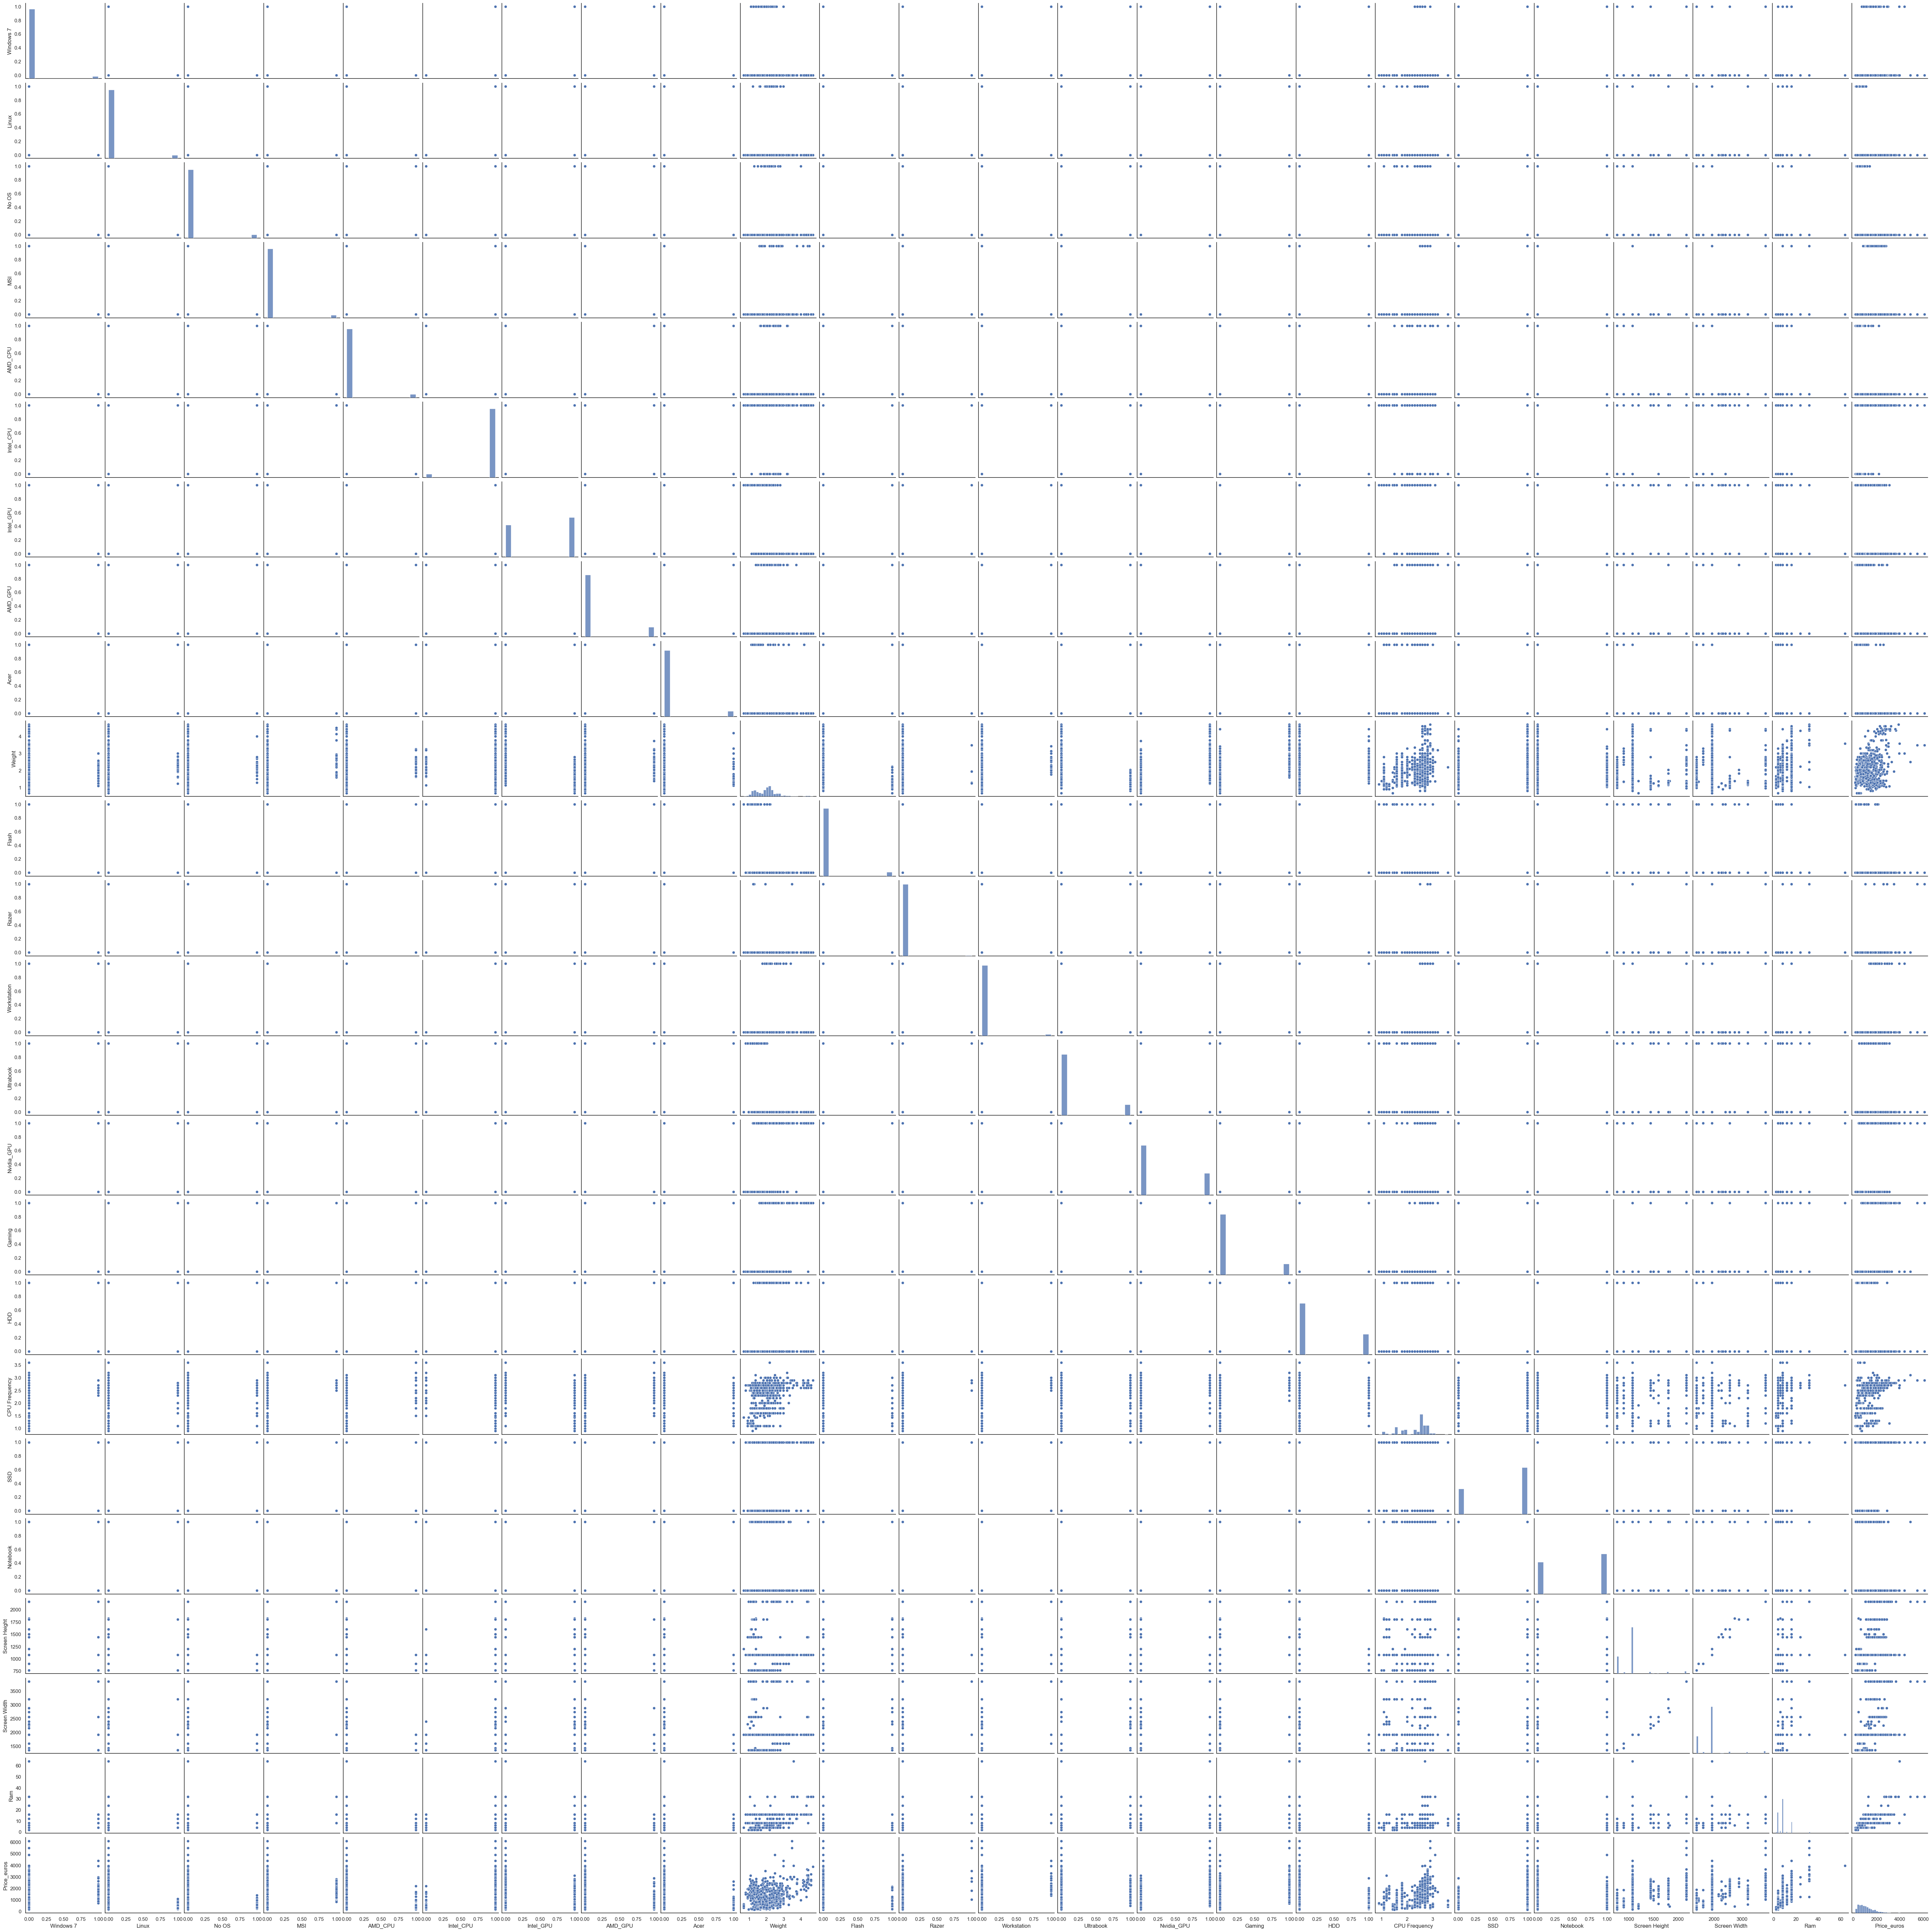

In [676]:
# Create a pairplot to visualize relationships between selected features

plt.figure(figsize=(20,20))
sns.pairplot(sorted_data)
plt.show()  

# Model Training and Testing

### Train-Test Split

We split the dataset into training (X_train, y_train) and testing (X_test, y_test) sets to build and evaluate our machine learning model.


### Feature Scaling

Before feeding our data into a machine learning model, we often need to perform feature scaling. This ensures that all our features have similar scales, preventing one feature from dominating the learning process.

We create a StandardScaler object to scale our features.
We apply the scaler to both the training and testing sets, resulting in X_train_scaled and X_test_scaled.

In [677]:
# Splitting data into train and test sets
X, y = data.drop("Price_euros", axis=1), data["Price_euros"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.13)


# Scaling features using StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Using Linear Regression Modal 

Linear regression is a supervised machine learning model used for predicting a continuous target variable based on a linear relationship between input features and the target.

I'm using linear regression because it provides a straightforward and interpretable way to understand the relationship between the input features and the target variable, making it a suitable choice for initial modeling when exploring the dataset and assessing the impact of individual features on the target variable.

In [680]:
# Instantiate the regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train_scaled, y_train)

LinearRegression()

In [681]:
# Getting the score from the Linear Regression
model.score(X_test_scaled, y_test)

r_squared = model.score(X_test_scaled, y_test)

# Print the R-squared score as a measure of model accuracy
print(f"R-squared Score: {r_squared  * 100 :.2f}%")

# Additionally, we can display the Mean Absolute Error (MAE) to provide more insights
y_pred = model.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Print the Mean Absolute Error
print(f"Mean Absolute Error (MAE): {mae:.2f}")

# Print the Mean Squared Error
print(f"Mean Squared Error (MSE): {mse:.2f}")

R-squared Score: 67.78%
Mean Absolute Error (MAE): 267.59
Mean Squared Error (MSE): 150190.39


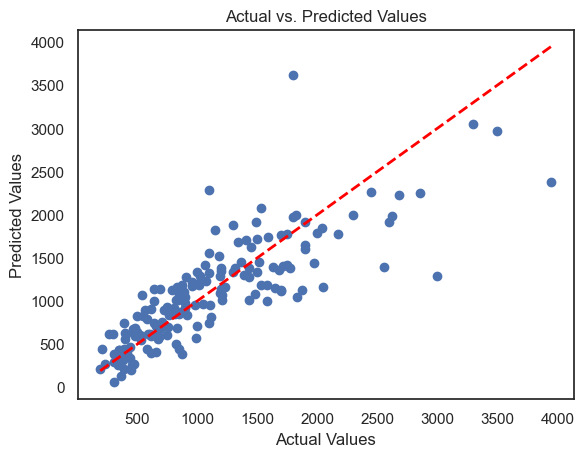

In [682]:
# Scatter plot comparing actual values to predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', lw=2)
plt.title("Actual vs. Predicted Values")
plt.show()

# Histogram of residuals to visualize their distribution
plt.hist(residuals, bins=30)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.show()


### Using Decision Tree Regression Modal

Decision tree regression is a supervised machine learning model that can capture complex relationships between input features and a continuous target variable by recursively partitioning the data into subsets. It is particularly useful when dealing with non-linear relationships or interactions between features.

I'm using decision tree regression to capture potential non-linear patterns and interactions in the data that linear regression might overlook. This model allows for more flexibility in modeling the target variable, making it a valuable addition to the modeling process.

In [685]:
# Instantiate the regression model
DT = DecisionTreeRegressor()

# Fit the model to the training data
DT.fit(X_train_scaled, y_train)

DecisionTreeRegressor()

In [686]:
# Calculate the score (R-squared) from the Decision Tree
r_squared = DT.score(X_test_scaled, y_test)

# Print the R-squared score as a measure of model accuracy
print(f"R-squared Score (Decision Tree): {r_squared * 100:.2f}%")

# Additionally, calculate and display the Mean Absolute Error (MAE)
y_pred_DT = DT.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred_DT)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

# Calculate and display the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred_DT)
print(f"Mean Squared Error (MSE): {mse:.2f}")


R-squared Score (Decision Tree): 68.06%
Mean Absolute Error (MAE): 243.70
Mean Squared Error (MSE): 148869.31


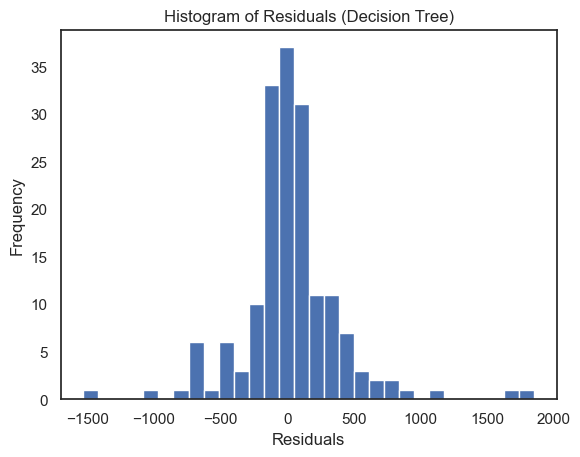

In [687]:
# Visualize the actual vs. predicted values using a scatter plot
plt.scatter(y_test, y_pred_DT)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', lw=2)
plt.title("Actual vs. Predicted Values (Decision Tree)")
plt.show()

# Visualize the residuals' distribution with a histogram
residuals_DT = y_test - y_pred_DT
plt.hist(residuals_DT, bins=30)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals (Decision Tree)")
plt.show()


### Using K-Nearest Neighbors (KNN) Regression Modal
K-Nearest Neighbors (KNN) regression is a supervised machine learning model that predicts a continuous target variable based on the average or weighted average of its k-nearest neighbors in the feature space. It is a simple yet effective model that can capture local patterns and adapt to complex data distributions.

I'm using KNN regression because it's a versatile model that can handle various data distributions and doesn't assume linear relationships between features and the target variable. By considering the k-nearest neighbors, KNN can provide accurate predictions, making it a valuable choice for capturing local nuances in the dataset.

In [688]:
# Create and fit the KNN regressor
knn_regressor = KNeighborsRegressor(n_neighbors=5, metric='euclidean')
knn_regressor.fit(X_train_scaled, y_train)

KNeighborsRegressor(metric='euclidean')

In [689]:
# Make predictions on the test data
y_pred = knn_regressor.predict(X_test_scaled)

# Calculate the R-squared (R2) score
r2 = r2_score(y_test, y_pred)

# Convert R-squared to a percentage
score_percentage = r2 * 100

# Print the R-squared score as a measure of model accuracy
print(f"R-squared Score: {score_percentage:.2f}%")

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

# Calculate and display the Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

R-squared Score: 63.07%
Mean Squared Error: 172135.71
Mean Absolute Error (MAE): 261.89


In [690]:
# Calculate the residuals (the differences between true values and predicted values)
residuals = y_test - y_pred

# Create a scatter plot of true values vs. residuals
plt.scatter(y_test, residuals)
plt.xlabel("True Values")
plt.ylabel("Residuals")
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0 for reference
plt.title("Residual Plot")
plt.show()

### Using RandomForestRegressor

Random Forest Regressor is a machine learning algorithm used for regression tasks. It's an ensemble learning method that combines the predictions of multiple decision trees to make more accurate predictions.

We are using the Random Forest Regressor model because it has proven to be effective for our laptop price prediction task. Its ability to handle complex data, reduce overfitting, and provide accurate predictions makes it a suitable choice. Additionally, it works well with both numerical and categorical features, which are common in laptop datasets. This model's ensemble nature, combining multiple decision trees, enhances its robustness and reliability in capturing intricate relationships within the data.

In [691]:
# Instantiate the Random Forest Regressor model
forest = RandomForestRegressor()

# Fit the model to the training data
forest.fit(X_train_scaled, y_train)

RandomForestRegressor()

In [692]:
# Calculate the R-squared score (model accuracy) for the Random Forest
r_squared_forest = forest.score(X_test_scaled, y_test)

# Print the R-squared score
print(f"R-squared Score (Random Forest): {r_squared_forest * 100:.2f}%")

# Calculate and display the Mean Absolute Error (MAE) for the Random Forest
mae_forest = mean_absolute_error(y_test, y_pred_forest)
print(f"Mean Absolute Error (MAE - Random Forest): {mae_forest:.2f}")

# Additionally, calculate and display the Mean Squared Error (MSE) for the Random Forest
y_pred_forest = forest.predict(X_test_scaled)
mse_forest = mean_squared_error(y_test, y_pred_forest)
print(f"Mean Squared Error (MSE - Random Forest): {mse_forest:.2f}")


R-squared Score (Random Forest): 78.34%
Mean Absolute Error (MAE - Random Forest): 717.82
Mean Squared Error (MSE - Random Forest): 100945.80


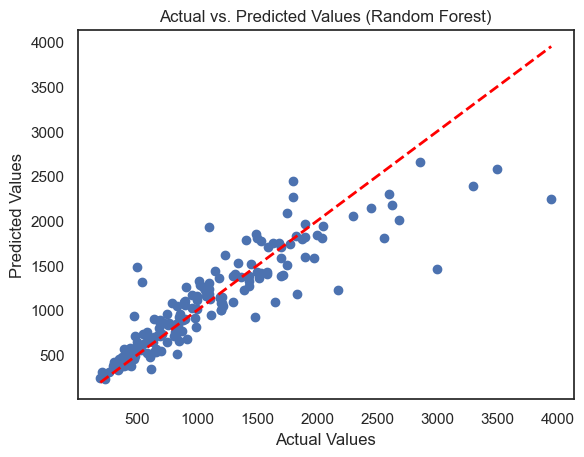

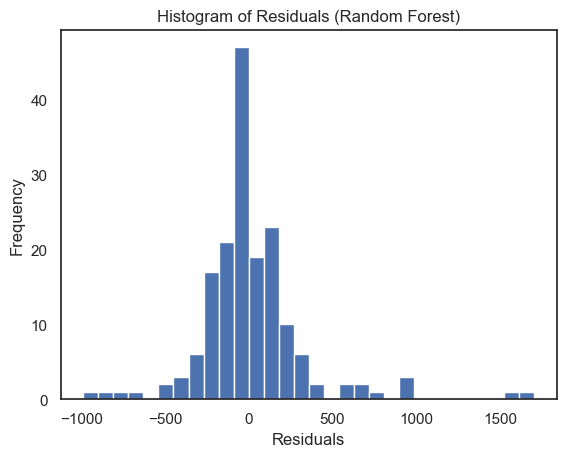

In [693]:
# Visualize the actual vs. predicted values using a scatter plot for Random Forest
plt.scatter(y_test, y_pred_forest)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', lw=2)
plt.title("Actual vs. Predicted Values (Random Forest)")
plt.show()

# Visualize the residuals' distribution with a histogram for Random Forest
residuals_forest = y_test - y_pred_forest
plt.hist(residuals_forest, bins=30)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals (Random Forest)")
plt.show()

### Using Neural Network Regression Model
A neural network regression model is a type of artificial neural network designed for predicting continuous target variables. It consists of multiple interconnected layers of artificial neurons, each layer performing transformations on the input data to learn complex patterns and relationships.

I'm using a neural network regression model because it excels at capturing intricate patterns and nonlinear relationships within the data. Neural networks are highly flexible and can adapt to various types of data, making them suitable for complex regression tasks. Additionally, they can automatically extract relevant features from the input data, reducing the need for extensive feature engineering.

In [694]:
# Step 1: Define the input and output dim
input_dim = 53
output_dim = 1

# Step 2: Define the Neural Network Model for Regression
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(input_dim,)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(output_dim, activation='linear')  # Linear activation for regression
])

# Step 3: Compile the Model for Regression
model.compile(optimizer='adam',
              loss='mean_squared_error',  # MSE for regression
              metrics=['mae', 'mse'])  # Include other regression metrics like MAE and MSE

# Custom R-squared metric
def r_squared(y_true, y_pred):
    residual = tf.reduce_sum(tf.square(tf.subtract(y_true, y_pred)))
    total = tf.reduce_sum(tf.square(tf.subtract(y_true, tf.reduce_mean(y_true))))
    r2 = 1 - tf.divide(residual, total)
    return r2

# Step 4: Train the Model
history = model.fit(X_train_scaled, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Step 5: Evaluate the Model for Regression
test_loss, mae, mse = model.evaluate(X_test_scaled, y_test)
y_pred = model.predict(X_test_scaled)
r2 = r2_score(y_test, y_pred)  # Calculate R-squared score

print(f'Test loss: {test_loss}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared Score (R²): {r2 * 100:.2f}%')


Epoch 1/20
29/29 [==============================] - 1s 12ms/step - loss: 1736307.8750 - mae: 1119.7361 - mse: 1736307.8750 - val_loss: 1836257.3750 - val_mae: 1145.9093 - val_mse: 1836257.3750
Epoch 2/20
29/29 [==============================] - 0s 5ms/step - loss: 1724964.5000 - mae: 1115.2957 - mse: 1724964.5000 - val_loss: 1816434.0000 - val_mae: 1138.8997 - val_mse: 1816434.0000
Epoch 3/20
29/29 [==============================] - 0s 4ms/step - loss: 1697760.8750 - mae: 1105.7085 - mse: 1697760.8750 - val_loss: 1772476.5000 - val_mae: 1124.0746 - val_mse: 1772476.5000
Epoch 4/20
29/29 [==============================] - 0s 5ms/step - loss: 1642800.1250 - mae: 1086.9922 - mse: 1642800.1250 - val_loss: 1687404.2500 - val_mae: 1096.1147 - val_mse: 1687404.2500
Epoch 5/20
29/29 [==============================] - 0s 5ms/step - loss: 1541642.5000 - mae: 1053.5902 - mse: 1541642.5000 - val_loss: 1542797.5000 - val_mae: 1047.9246 - val_mse: 1542797.5000
Epoch 6/20
29/29 [=====================

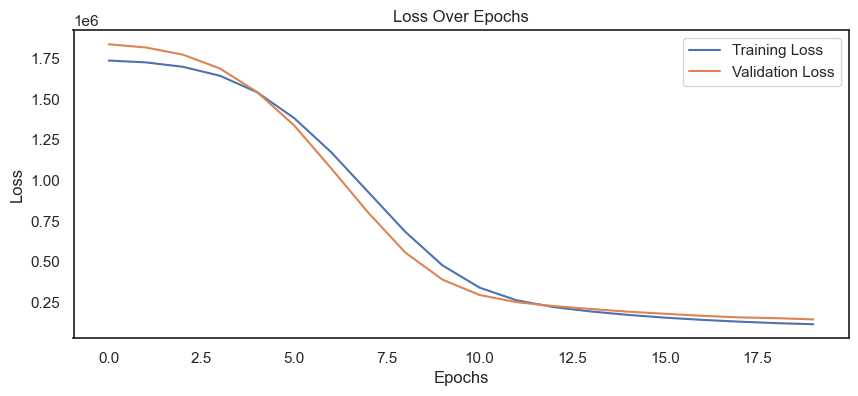

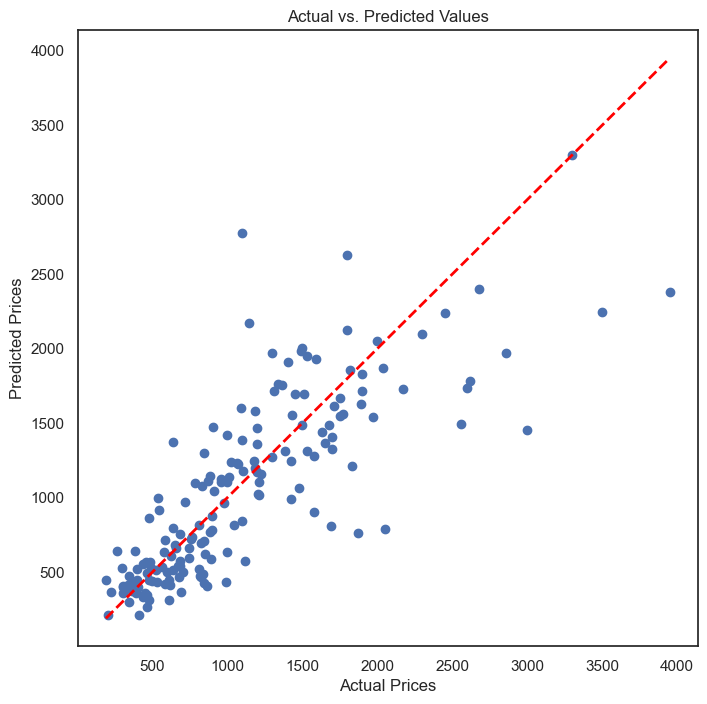

In [695]:
# Line Plot of Loss Over Epochs
plt.figure(figsize=(10, 4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Scatter Plot of Actual vs. Predicted Values
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred)
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Prices')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', lw=2)
plt.ylabel('Predicted Prices')
plt.show()